In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决无法显示符号的问题
sns.set(font='SimHei', font_scale=1.2, style='darkgrid')  # 解决Seaborn中文显示问题
palette = 'deep'


In [9]:
# df = pd.read_excel('../原始数据/附件1：物流网络历史货量数据.xlsx')
df = pd.read_excel('左侧填充-物流网络历史货量数据.xlsx')
df

,场地1,场地2,2021-01-01,2021-01-02,2021-01-03,2021-01-04,2021-01-05,2021-01-06,2021-01-07,2021-01-08,...,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-12-30,2022-12-31
0,DC1,DC8,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,DC10,DC12,306,328,163,193,565,964,623,284,...,73,73,73,73,73,73,73,73,73,73
2,DC10,DC13,4,4,4,4,4,4,4,4,...,2,2,2,2,2,2,2,2,2,2
3,DC10,DC14,2613,2941,5968,4459,7646,5106,7155,5939,...,8663,9818,12248,13255,9896,15492,8230,29021,9991,13254
4,DC10,DC17,5,5,5,5,5,5,5,5,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,DC9,DC58,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1045,DC9,DC62,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1046,DC9,DC67,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,1
1047,DC9,DC79,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [10]:
# 宽表转长表
df = pd.melt(df, id_vars=['场地1', '场地2'], var_name='日期', value_name='货量')
print(df.dtypes)
df

场地1    object
场地2    object
日期     object
货量      int64
dtype: object


,场地1,场地2,日期,货量
0,DC1,DC8,2021-01-01,3
1,DC10,DC12,2021-01-01,306
2,DC10,DC13,2021-01-01,4
3,DC10,DC14,2021-01-01,2613
4,DC10,DC17,2021-01-01,5
...,...,...,...,...
765765,DC9,DC58,2022-12-31,1
765766,DC9,DC62,2022-12-31,2
765767,DC9,DC67,2022-12-31,1
765768,DC9,DC79,2022-12-31,2


In [60]:
# 添加年份列
ddf = df.copy()
df['日期'] = pd.to_datetime(df['日期'], format='%Y-%m-%d')
ddf['年份'] = ddf['日期'].dt.year
ddf['月日'] = df['日期'].dt.strftime('%m-%d')
ddf

,场地1,场地2,日期,货量,年份,月日
0,DC1,DC8,2021-01-01,3,2021,01-01
1,DC10,DC12,2021-01-01,306,2021,01-01
2,DC10,DC13,2021-01-01,4,2021,01-01
3,DC10,DC14,2021-01-01,2613,2021,01-01
4,DC10,DC17,2021-01-01,5,2021,01-01
...,...,...,...,...,...,...
765765,DC9,DC58,2022-12-31,1,2022,12-31
765766,DC9,DC62,2022-12-31,2,2022,12-31
765767,DC9,DC67,2022-12-31,1,2022,12-31
765768,DC9,DC79,2022-12-31,2,2022,12-31


In [61]:
ddf = ddf[ddf['年份'] == 2022]

In [62]:
','.join(ddf.columns.values.tolist())

'场地1,场地2,日期,货量,年份,月日'

In [63]:
# 按月日排序
ddf.sort_values(by='月日').reset_index(drop=True, inplace=True)
ddf

,场地1,场地2,日期,货量,年份,月日
382885,DC1,DC8,2022-01-01,3,2022,01-01
382886,DC10,DC12,2022-01-01,73,2022,01-01
382887,DC10,DC13,2022-01-01,2,2022,01-01
382888,DC10,DC14,2022-01-01,2759,2022,01-01
382889,DC10,DC17,2022-01-01,2,2022,01-01
...,...,...,...,...,...,...
765765,DC9,DC58,2022-12-31,1,2022,12-31
765766,DC9,DC62,2022-12-31,2,2022,12-31
765767,DC9,DC67,2022-12-31,1,2022,12-31
765768,DC9,DC79,2022-12-31,2,2022,12-31


[(0.86, 0.3712, 0.33999999999999997), (0.86, 0.7612000000000001, 0.33999999999999997), (0.5688000000000001, 0.86, 0.33999999999999997), (0.33999999999999997, 0.86, 0.5012000000000001), (0.33999999999999997, 0.8287999999999999, 0.86), (0.33999999999999997, 0.43879999999999986, 0.86), (0.6311999999999998, 0.33999999999999997, 0.86), (0.86, 0.33999999999999997, 0.6987999999999996)]


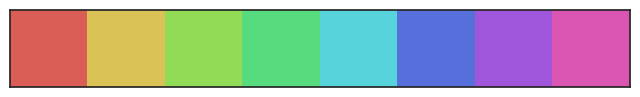

In [64]:
print(sns.color_palette('hls', 8))
pc = sns.color_palette('hls', 8)
sns.palplot(pc)

D:\Users\win\AppData\Local\Temp\ipykernel_5592\4109459013.py:7: UserWarning: The palette list has more values (7) than needed (1), which may not be intended.
  sns.lineplot(ddf, x='月日', y='货量', hue='年份', palette=sns.color_palette('hls', 8)[1:])


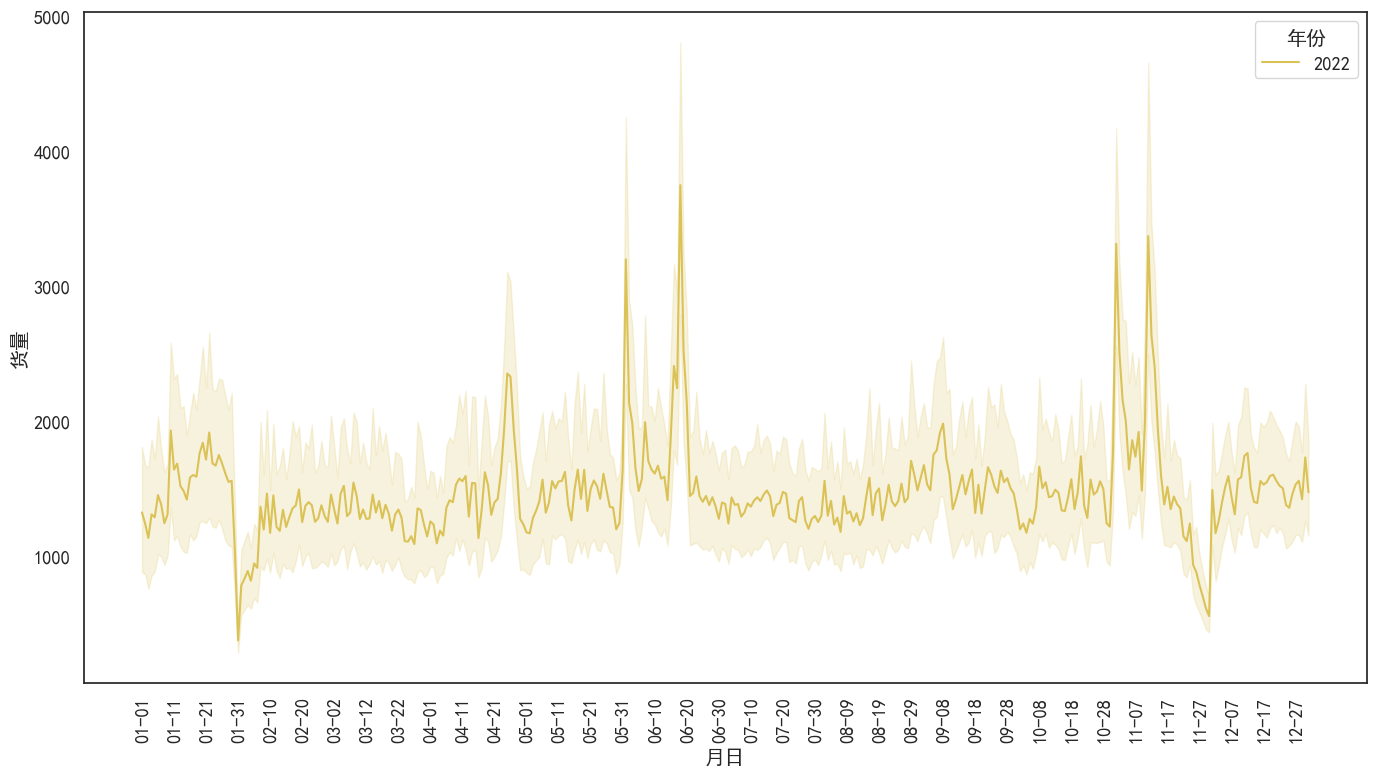

In [66]:
# 以年份为类目，按月份，全路线货量-置信区间折线图
# for style in ['darkgrid', 'whitegrid', 'white', 'dark']:
style = 'white'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(ddf, x='月日', y='货量', hue='年份', palette=sns.color_palette('hls', 8)[1:])

plt.xticks(ddf['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，全路线货量-置信区间折线图-{style}.svg')
plt.show()

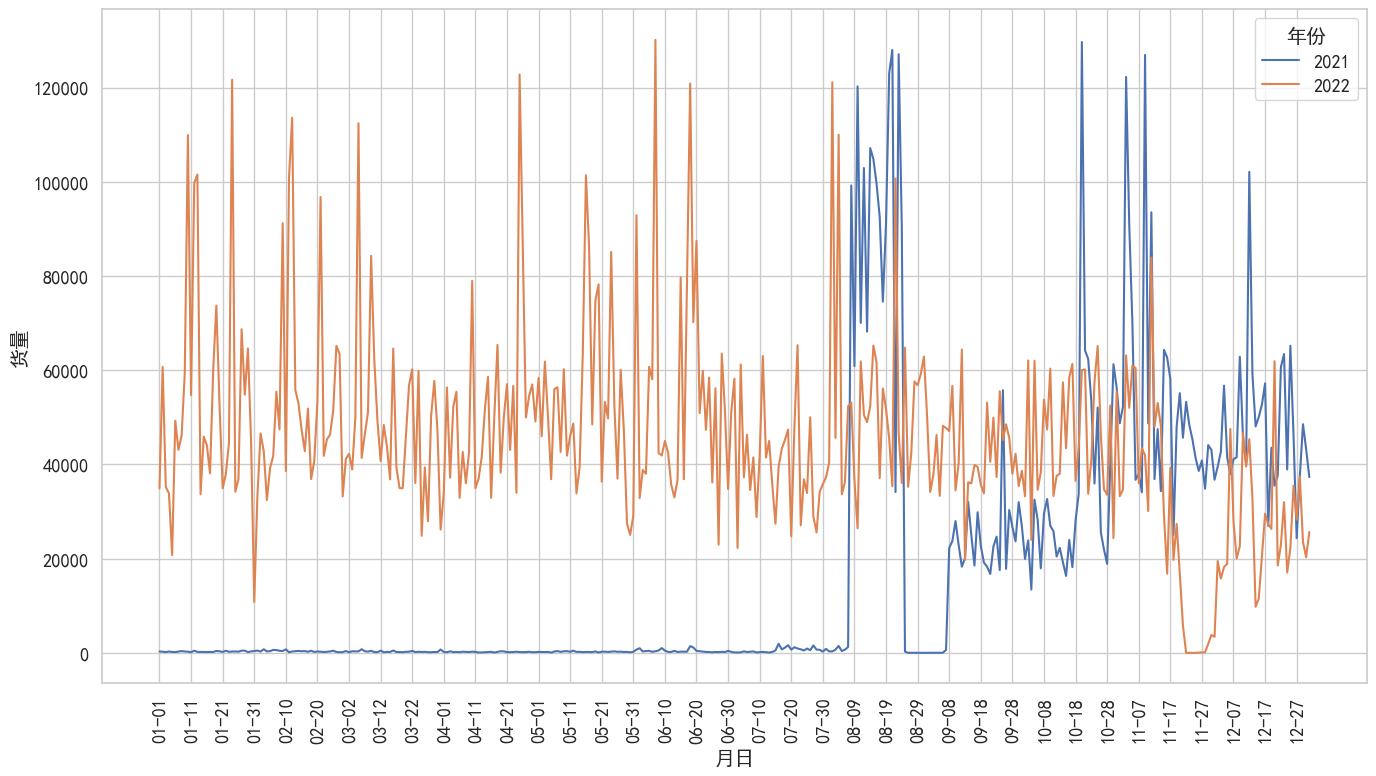

In [116]:
# 以年份为类目，按月份，DC14→DC10 货量-折线图
data = ddf[(ddf['场地1'] == 'DC14') & (ddf['场地2'] == 'DC10')].sort_values(by='月日').reset_index(drop=True)

style = 'whitegrid'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(data, x='月日', y='货量', hue='年份', palette=palette)

plt.xticks(data['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，DC14→DC10 货量-折线图-{style}.svg')
plt.show()

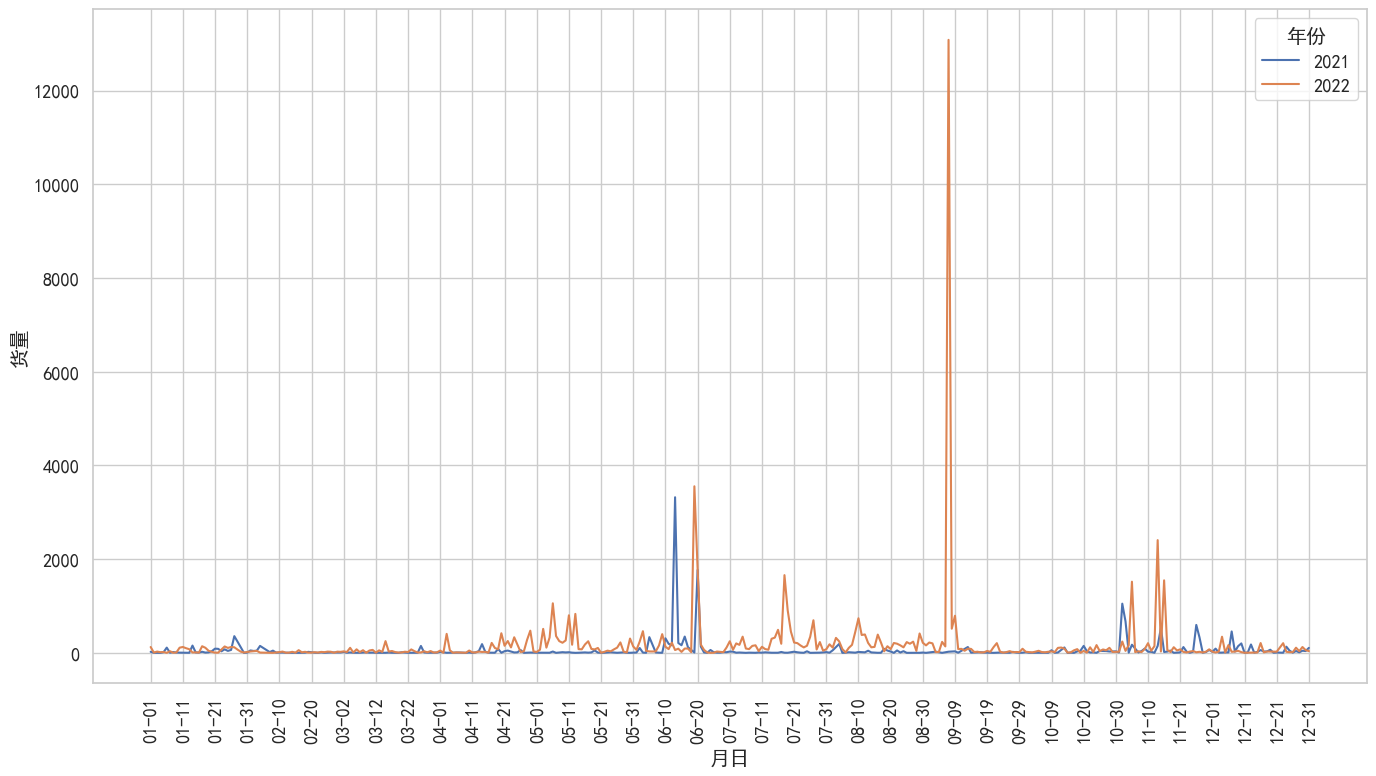

In [117]:
# 以年份为类目，按月份，DC20→DC35 货量-折线图
data = ddf[(ddf['场地1'] == 'DC20') & (ddf['场地2'] == 'DC35')].sort_values(by='月日').reset_index(drop=True)

style = 'whitegrid'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(data, x='月日', y='货量', hue='年份', palette=palette)

plt.xticks(data['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，DC20→DC35 货量-折线图-{style}.svg')
plt.show()

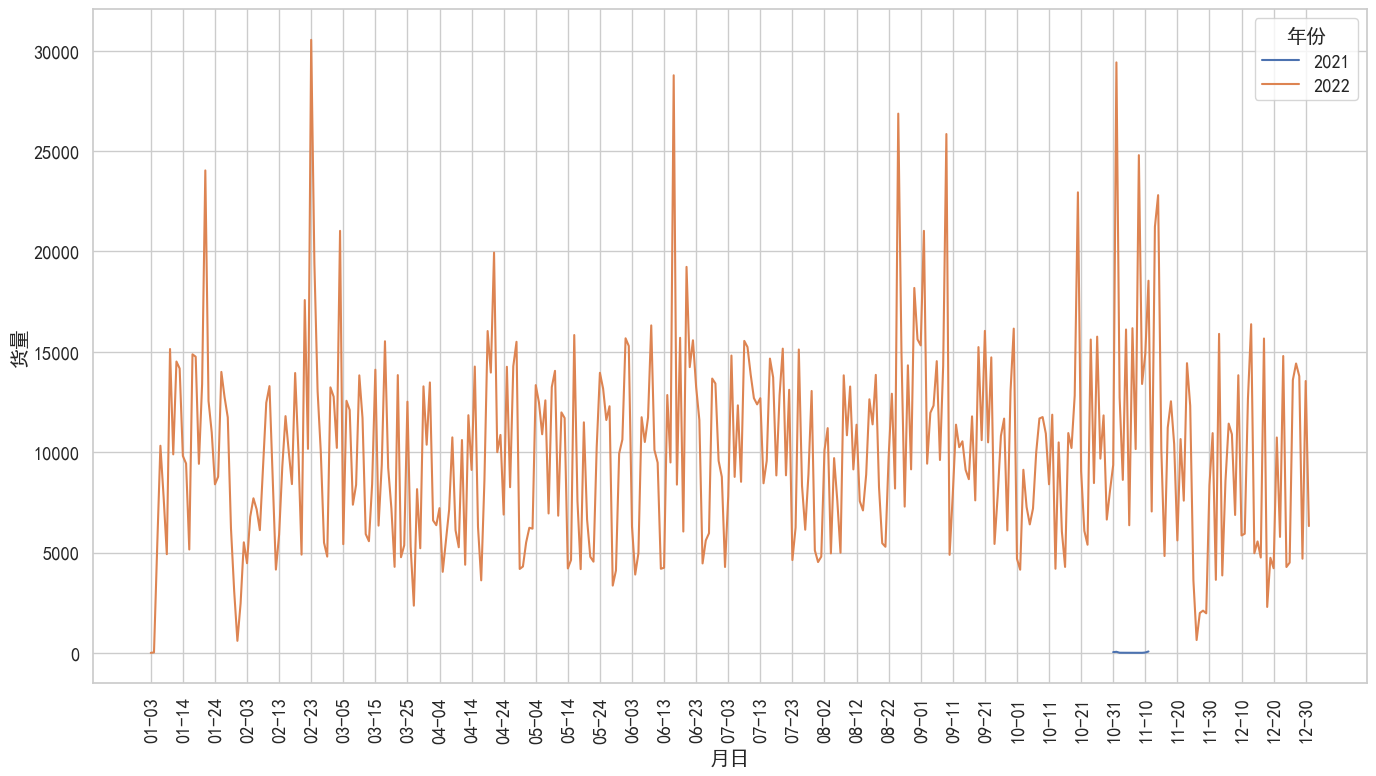

In [118]:
# 以年份为类目，按月份，DC25→DC62 货量-折线图
data = ddf[(ddf['场地1'] == 'DC25') & (ddf['场地2'] == 'DC62')].sort_values(by='月日').reset_index(drop=True)

style = 'whitegrid'

sns.set(font='SimHei', font_scale=1.2, style=style)
plt.figure(figsize=(14, 8))
sns.lineplot(data, x='月日', y='货量', hue='年份', palette=palette)

plt.xticks(data['月日'].unique()[::10], rotation=90)
plt.tight_layout()
plt.savefig(f'以年份为类目，按月份，DC25→DC62 货量-折线图-{style}.svg')
plt.show()